In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install torchvision==0.13.0 torch==1.12.0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0+cu116
    Uninstalling torch-1.13.0+cu116:
      Successfully uninstalled torch-1.13.0+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0+cu116
    Uninstalling torchvision-0.14.0+cu116:
      Successfully uninstalled torchvision-0.14.0+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.0 requires torch==1.13.0, but you have torch 1.12.0 which is incompatible.
torchaudio 0.13.0+cu116 requires torch==1.13.0, but you have torch 1.12.0 which is incompatible.


In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 20.1 MB/s eta 0:00:00


In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 30.7 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torchmetrics import AUROC
import io
import matplotlib.pyplot as plt
import time
import os
import copy
from glob import glob
from tqdm import tqdm

import warnings
import pandas as pd
from sklearn.metrics import f1_score,accuracy_score,recall_score,roc_auc_score,roc_curve
warnings.simplefilter('ignore')


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.get_device_name())

cuda:0
Tesla T4


In [ ]:
!pip install split-folders

import splitfolders as sf

sf.ratio('gdrive/MyDrive/Marwan/Alzheimer_s Dataset/train','output',ratio=(0.8,0.2,0),seed=42)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 5121 files [02:48, 30.39 files/s] 


# learn

In [ ]:
count_mildDem = 0
count_moderateDem = 0
count_nonDem = 0
count_veryMildeDem = 0
count_mildDem2 = 0
count_moderateDem2 = 0
count_nonDem2 = 0
count_veryMildeDem2 = 0
count_mildDem3 = 0
count_moderateDem3 = 0
count_nonDem3 = 0
count_veryMildeDem3 = 0

In [ ]:
from torch.utils.data import WeightedRandomSampler

In [ ]:
BATCH_SIZE=24
EPOCH=60
LEARNING_RATE=0.0001

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(p=0.25),
        transforms.RandomVerticalFlip(p=0.25),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(0.1,0.1,0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "test" :
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './output'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                        data_transforms[x])
                    for x in ['train', 'val']}
data_dir2 = 'gdrive/MyDrive/Marwan/Alzheimer_s Dataset'
image_datasets["test"] = datasets.ImageFolder(os.path.join(data_dir2, "test"),
                                        data_transforms["test"])


for i in image_datasets["train"].imgs:
  if i[1] == 0:
    count_mildDem += 1
  elif i[1] == 1:
    count_moderateDem += 1
  elif i[1] == 2:
    count_nonDem += 1
  else:
    count_veryMildeDem += 1

for i in image_datasets["val"].imgs:
  if i[1] == 0:
    count_mildDem2 += 1
  elif i[1] == 1:
    count_moderateDem2 += 1
  elif i[1] == 2:
    count_nonDem2 += 1
  else:
    count_veryMildeDem2 += 1

for i in image_datasets["test"].imgs:
  if i[1] == 0:
    count_mildDem3 += 1
  elif i[1] == 1:
    count_moderateDem3 += 1
  elif i[1] == 2:
    count_nonDem3 += 1
  else:
    count_veryMildeDem3 += 1

lis = [count_mildDem,count_moderateDem,count_nonDem,count_veryMildeDem]
lis2 = [count_mildDem2,count_moderateDem2,count_nonDem2,count_veryMildeDem2]
lis3 = [count_mildDem3,count_moderateDem3,count_nonDem3,count_veryMildeDem3]
class_weights = [sum(lis)/ c for c in lis]
class_weights2 = [sum(lis2)/ c for c in lis2]
class_weights3 = [sum(lis3)/ c for c in lis3]

example_weights = [class_weights[i[1]] for i in image_datasets["train"].imgs]
example_weights2 = [class_weights2[i[1]] for i in image_datasets["val"].imgs]
example_weights3 = [class_weights3[i[1]] for i in image_datasets["test"].imgs]

sampler = WeightedRandomSampler(example_weights, len(image_datasets["train"].imgs))
sampler2 = WeightedRandomSampler(example_weights2, len(image_datasets["val"].imgs))
sampler3 = WeightedRandomSampler(example_weights3, len(image_datasets["test"].imgs))

dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=BATCH_SIZE, sampler = sampler,
                                            shuffle=False, num_workers=4),
    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=BATCH_SIZE, #sampler = sampler2,
                                            shuffle=True, num_workers=4),
    'test': torch.utils.data.DataLoader(image_datasets['test'], batch_size=BATCH_SIZE, #sampler = sampler3,
                                            shuffle=True, num_workers=4)
                                            }

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val',"test"]}
class_names = image_datasets['train'].classes

In [ ]:
!pip install vit_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 3.6 MB/s eta 0:00:00


torch.Size([3, 680, 1810])


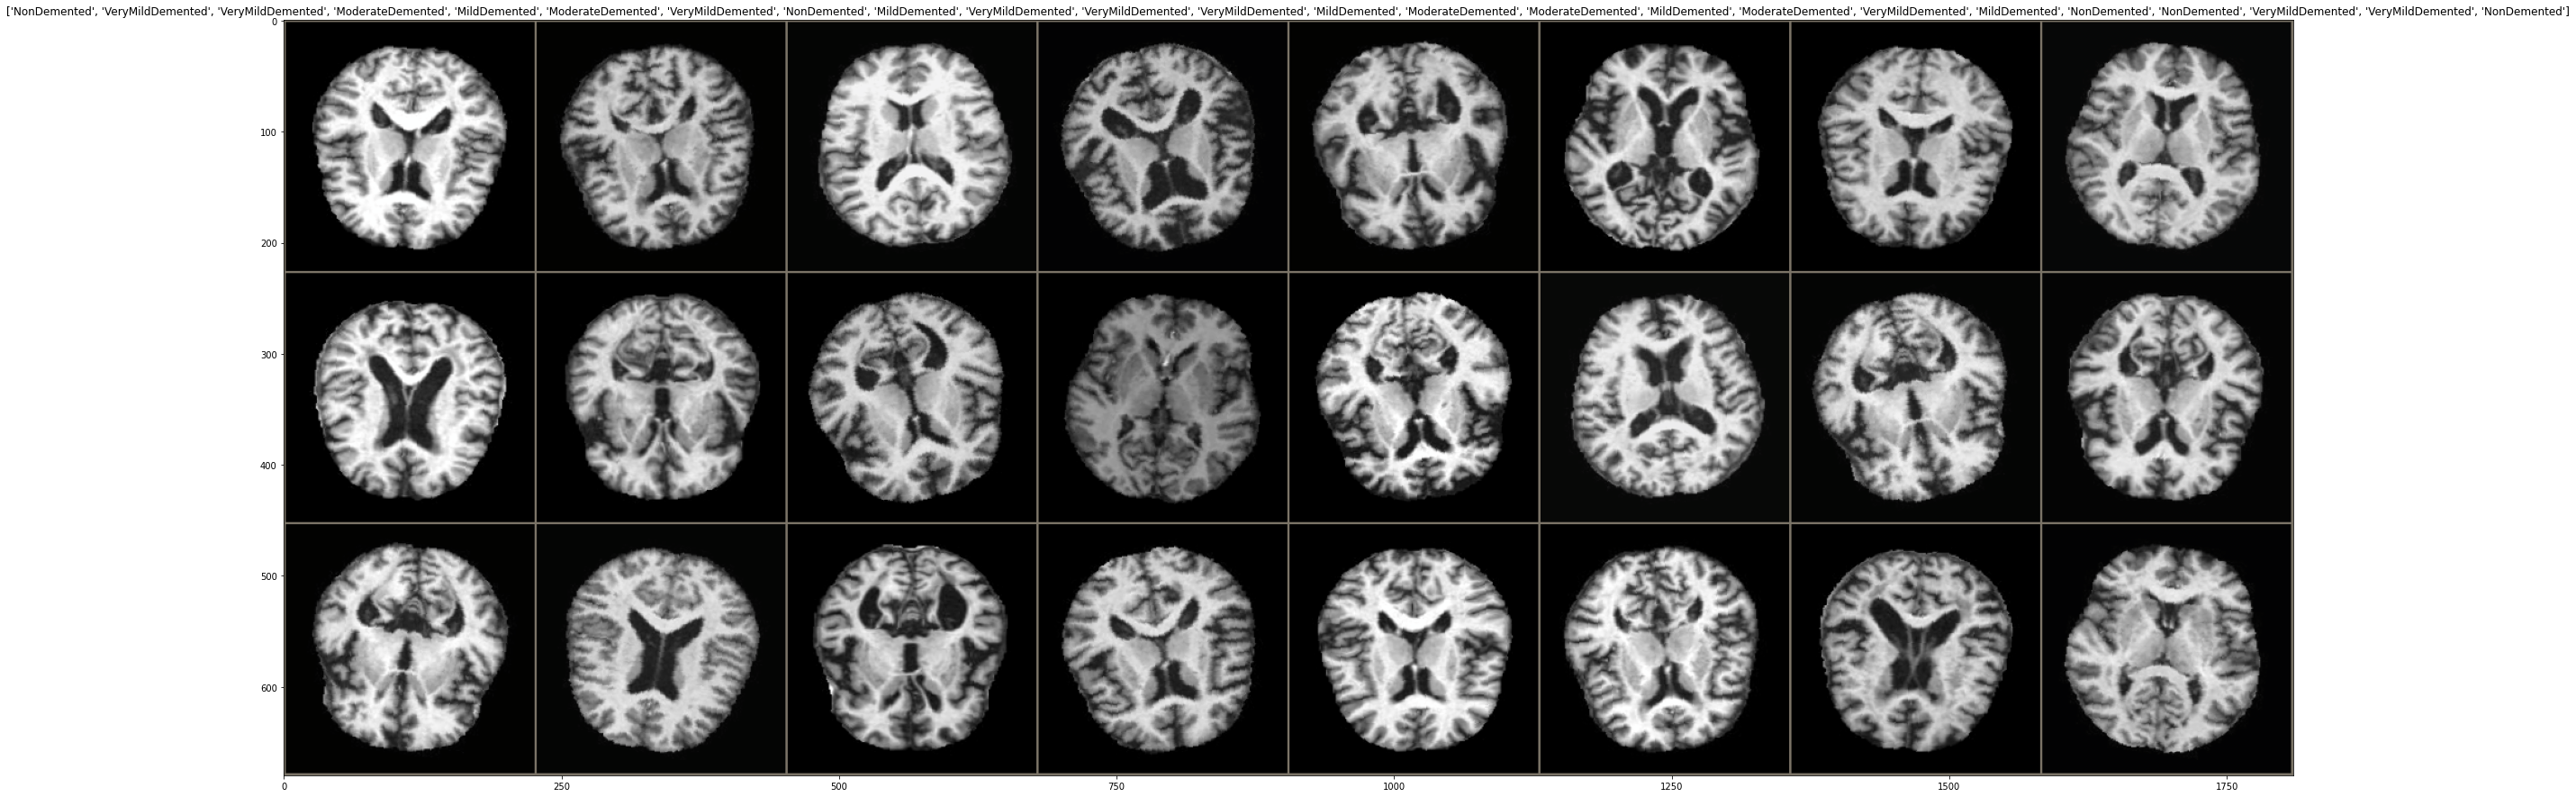

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    print(inp.shape)
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(40,40))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, name, num_epochs=25, feature_extractor = None):

    #Creating a folder to save the model performance.
    try:

        os.mkdir('modelPerformance')
        os.mkdir(f'modelPerformance/{name}')
    except:
        print('directory exists')

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    

    for epoch in range(num_epochs):

        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            #epochs
            
            epoch=int(len(image_datasets[phase])/BATCH_SIZE)
            
            for _ in tqdm(range(epoch)):
                #Loading Data
                inputs, labels = next(iter(dataloaders[phase]))
                #inputs = feature_extractor(images=inputs, return_tensors="pt")
                inputs = inputs.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)

                    outputs = outputs.logits

                    _, preds = torch.max(outputs, 1)

                    labels = labels.to(device)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            #AUC: {:.4f} , epoch_auc
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(        
                phase, epoch_loss, epoch_acc))
    
            
            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model,'/content/modelPerformance/{}/best_model_{:.4f}acc_{}epochs.h5'.format(name,epoch_acc,num_epochs))

                train_losses = []
                valid_losses = []

        print()


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    
    with open(f'/content/modelPerformance/{name}/'+sorted(os.listdir(f'/content/modelPerformance/{name}/'))[-1], 'rb') as f:
        buffer = io.BytesIO(f.read())
    model=torch.load(buffer)
    # load best model weights
    model.load_state_dict(best_model_wts)

    return model

In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:
import gc
gc.collect()


2524

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 71.5 MB/s eta 0:00:00


In [ ]:
# from vit_pytorch import SimpleViT
from transformers import ConvNextForImageClassification
import torch
model = ConvNextForImageClassification.from_pretrained("facebook/convnext-base-224", ignore_mismatched_sizes=True, num_labels=4)


Downloading:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/354M [00:00<?, ?B/s]

Some weights of ConvNextForImageClassification were not initialized from the model checkpoint at facebook/convnext-base-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([4, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# model = CrossViT(
#     image_size = 224,
#     num_classes = 4,
#     depth = 4,               # number of multi-scale encoding blocks
#     sm_dim = 192,            # high res dimension
#     sm_patch_size = 16,      # high res patch size (should be smaller than lg_patch_size)
#     sm_enc_depth = 2,        # high res depth
#     sm_enc_heads = 8,        # high res heads
#     sm_enc_mlp_dim = 2048,   # high res feedforward dimension
#     lg_dim = 384,            # low res dimension
#     lg_patch_size = 32,      # low res patch size
#     lg_enc_depth = 3,        # low res depth
#     lg_enc_heads = 8,        # low res heads
#     lg_enc_mlp_dim = 2048,   # low res feedforward dimensions
#     cross_attn_depth = 2,    # cross attention rounds
#     cross_attn_heads = 8,    # cross attention heads
#     dropout = 0.1,
#     emb_dropout = 0.1
# )
# model.load_state_dict(torch.load("gdrive/MyDrive/Marwan/CrossVITModel.pth"))
# model = SimpleViT(
#     image_size = 224,
#     patch_size = 32,
#     num_classes = 4,
#     dim = 1024,
#     depth = 6,
#     heads = 16,
#     mlp_dim = 2048
# )

model.load_state_dict(torch.load("gdrive/MyDrive/Marwan/convNext.pth"))

model_ft = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.AdamW(model_ft.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01)
#optimizer_ft = optim.AdamW(model_ft.parameters(), lr=LEARNING_RATE, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, name="CrossFormer", num_epochs=10)


directory exists
Epoch 1/10
----------


100%|██████████| 170/170 [06:07<00:00,  2.16s/it]


train Loss: 0.1220 Acc: 0.9534


100%|██████████| 53/53 [01:11<00:00,  1.34s/it]


test Loss: 0.6147 Acc: 0.7451

Epoch 2/10
----------


100%|██████████| 170/170 [06:09<00:00,  2.18s/it]


train Loss: 0.0922 Acc: 0.9646


100%|██████████| 53/53 [01:08<00:00,  1.28s/it]


test Loss: 0.7365 Acc: 0.7342

Epoch 3/10
----------


100%|██████████| 170/170 [05:57<00:00,  2.10s/it]


train Loss: 0.0840 Acc: 0.9683


100%|██████████| 53/53 [01:14<00:00,  1.41s/it]


test Loss: 0.8382 Acc: 0.7467

Epoch 4/10
----------


100%|██████████| 170/170 [05:55<00:00,  2.09s/it]


train Loss: 0.0733 Acc: 0.9692


100%|██████████| 53/53 [01:08<00:00,  1.30s/it]


test Loss: 0.6467 Acc: 0.7670

Epoch 5/10
----------


100%|██████████| 170/170 [05:57<00:00,  2.10s/it]


train Loss: 0.0679 Acc: 0.9697


100%|██████████| 53/53 [01:14<00:00,  1.40s/it]


test Loss: 0.6751 Acc: 0.7803

Epoch 6/10
----------


100%|██████████| 170/170 [06:02<00:00,  2.13s/it]


train Loss: 0.0443 Acc: 0.9807


100%|██████████| 53/53 [01:09<00:00,  1.31s/it]


test Loss: 0.6798 Acc: 0.7686

Epoch 7/10
----------


100%|██████████| 170/170 [06:00<00:00,  2.12s/it]


train Loss: 0.0480 Acc: 0.9797


100%|██████████| 53/53 [01:14<00:00,  1.40s/it]


test Loss: 0.8610 Acc: 0.7365

Epoch 8/10
----------


100%|██████████| 170/170 [06:02<00:00,  2.13s/it]


train Loss: 0.0219 Acc: 0.9897


100%|██████████| 53/53 [01:12<00:00,  1.37s/it]


test Loss: 0.7180 Acc: 0.7654

Epoch 9/10
----------


100%|██████████| 170/170 [06:28<00:00,  2.29s/it]


train Loss: 0.0139 Acc: 0.9927


100%|██████████| 53/53 [01:15<00:00,  1.43s/it]


test Loss: 0.7527 Acc: 0.7654

Epoch 10/10
----------


100%|██████████| 170/170 [06:21<00:00,  2.25s/it]


train Loss: 0.0131 Acc: 0.9929


100%|██████████| 53/53 [01:16<00:00,  1.45s/it]


test Loss: 0.7730 Acc: 0.7600

Training complete in 73m 13s
Best val Acc: 0.780297


In [ ]:
'/content/modelPerformance/CrossFormer/'+sorted(os.listdir('/content/modelPerformance/CrossFormer'))[-1]

'/content/modelPerformance/CrossFormer/best_model_0.7803acc_10epochs.h5'

In [ ]:
best_model=torch.load('/content/modelPerformance/CrossFormer/'+sorted(os.listdir('/content/modelPerformance/CrossFormer'))[-1])

In [ ]:
type(best_model)

transformers.models.convnext.modeling_convnext.ConvNextForImageClassification

In [ ]:
torch.save(best_model.state_dict(), "gdrive/MyDrive/Marwan/convNext2.pth")

In [ ]:
from torchmetrics.classification import MulticlassF1Score

In [ ]:
import numpy

accuracies = []
y_pred = []
y_true = []
def test_model(model ,device, test_loader):
        correct = 0
        total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data[0].to(device), data[1].to(device)
                y_true.extend(labels.cpu().numpy())
                #metric = MulticlassF1Score(num_classes=4).to(device)
                outputs = best_model(images)
                _, predicted = torch.max(outputs.logits, 1)
                y_pred.extend(predicted.cpu().numpy())
                # acc = metric(outputs.logits,labels)
                # accuracies.append(acc)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Correct Prediction: {:d}  Total Images: {:d}'.format(correct, total))
        print('Test Accuracy = {:f}'.format(correct / total))

test_model(best_model,'cuda',dataloaders['test'])
#print(f"f1 score = {sum(accuracies)/ len(accuracies)}")

Correct Prediction: 977  Total Images: 1279
Test Accuracy = 0.763878


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)


In [ ]:
# count_mildDem = 0
# count_moderateDem = 0
# count_nonDem = 0
# count_veryMildeDem = 0

class_names = ('mildDemented', 'moderateDemented', 'nonDemented', 'veryMildDemented')
 
# Create pandas dataframe
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)


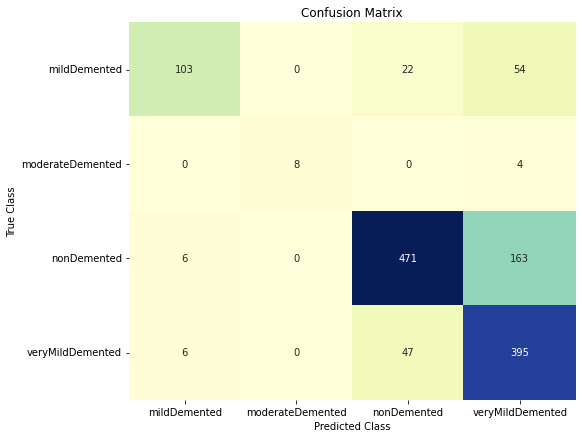

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
 
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None,cmap="YlGnBu",fmt="d")
 
plt.title("Confusion Matrix"), plt.tight_layout()
 
plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()

In [ ]:
precision midldDemented Model2 Validation: 0.5754
precision moderateDemented Model2 Validation: 0.6667
precision nonDemented Model2 Validation: 0.7359
precision veryMildDemented Model2 Validation: 0.8817
Recall midldDemented Model2 Validation: 0.8956
Recall moderateDemented Model2 Validation: 1.00
Recall nonDemented Model2 Validation: 0.8722
Recall veryMildDemented Model2 Validation: 0.6412